In [1]:
from pathlib import Path
import json

import xarray as xr
import rioxarray
import shapely
import geopandas as gpd

### Open Dataset

In [2]:
dataset_name = {
    'Geo-Polar': [
        'L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB_20020901_20230831_original.nc',
        'L4_GHRSST-SSTfnd-Geo_Polar_Blended_Night-GLOB-v02.0-fv01.0_CB_20020901_20230831.nc'
    ],
    'MUR': [
        'MUR-JPL-L4_GHRSST-SSTfnd-GLOB-v02.0-fv04.1-20020901_20230831_original.nc',
        'MUR-JPL-L4_GHRSST-SSTfnd-GLOB-v02.0-fv04.1-20020901_20230831.nc'
    ],
    'OSTIA': [
        'METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_analysed_sst_77.47W-75.53W_36.78N-39.97N_2007-01-01-2023-09-01_original.nc',
        'METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_analysed_sst_77.47W-75.53W_36.78N-39.97N_2007-01-01-2023-09-01.nc'
    ]
}
        

In [20]:
datapath = Path('/Users/rwegener/repos/chesapeake_mhw/data/raw') / \
    dataset_name['OSTIA'][0]

In [21]:
# open file
ds = xr.open_dataset(datapath)
# assign valid crs
ds.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:       (time: 6088, latitude: 65, longitude: 40)
Coordinates:
  * latitude      (latitude) float32 36.78 36.83 36.88 ... 39.88 39.92 39.97
  * longitude     (longitude) float32 -77.47 -77.43 -77.38 ... -75.57 -75.53
  * time          (time) datetime64[ns] 2007-01-01 2007-01-02 ... 2023-09-01
    spatial_ref   int64 0
Data variables:
    analysed_sst  (time, latitude, longitude) float32 ...
Attributes: (12/48)
    Conventions:                CF-1.4, ACDD-1.3
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    WARNING Some applications are unable to prope...
    creator_email:              enquiries@metoffice.gov.uk
    ...                         ...
    time_coverage_end:          20240119T000000Z
    time_coverage_start:        20240118T000000Z
    title:                      Global SST & Sea Ice Analysis, L4 OSTIA, 0.05...
    uuid:                       536d4865-f5a8-45b2-806f-1f1db491069a
    westernmost_longitude:      -180.0
    copernicusmarine_version:   1.3.5

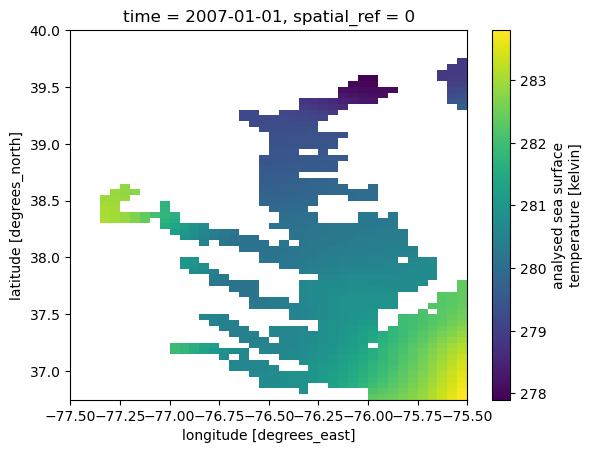

In [22]:
ds.analysed_sst.isel(time=0).plot()

### Create geometry object used to crop

In [23]:
cbay_wkt = (
    'POLYGON ((-75.07331635657022 36.69945277755481,' 
    '-75.07331761665449 38.10656782772858, -75.37020665599995 38.29321651673962,'  
    '-75.7561692781297 39.85271304991599, -77.9036114835175 39.860284284356595,'
    '-77.9432159124284 36.7312001366339, -75.07331635657022 36.69945277755481))'
)

In [24]:
cbay_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries.from_wkt([cbay_wkt]), 
                            crs='EPSG:4326')

### Crop the dataset

In [25]:
clipped = ds.rio.clip(cbay_gdf.geometry.values, cbay_gdf.crs, drop=False)

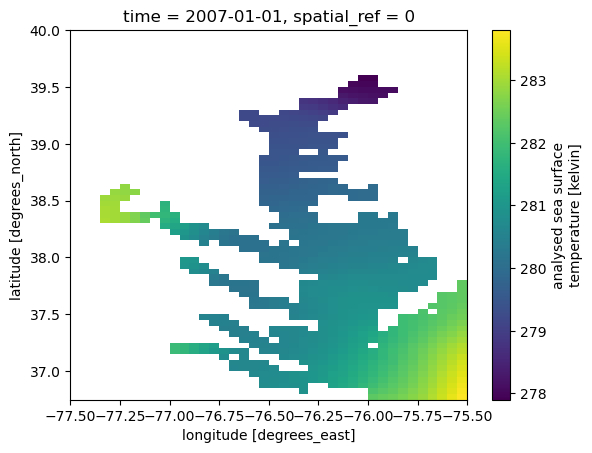

In [26]:
clipped.analysed_sst.isel(time=0).plot()

### Save

In [27]:
clipped.to_netcdf(Path('/Users/rwegener/repos/chesapeake_mhw/data/raw') / \
    dataset_name['OSTIA'][1])

### Notes

As far as I can tell this formatting mirrors the docs exactly.

https://corteva.github.io/rioxarray/html/examples/clip_geom.html#Clip-using-a-geometry

Why doesn't it work? Github ticket or PR?

In [11]:
cbay_shape = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [-75.07331635657022, 36.69945277755481],
            [-75.07331761665449, 38.10656782772858],
            [-75.37020665599995, 38.29321651673962],
            [-75.7561692781297, 39.85271304991599],
            [-77.9036114835175, 39.860284284356595],
            [-77.9432159124284, 36.7312001366339],
            [-75.07331635657022, 36.69945277755481]
        ]]
    }
]